# **Parte 1 Infraestrutura**

In [34]:
import sys, platform
import numpy as np, pandas as pd, sklearn, matplotlib as plt, seaborn as sns

print("Python:", sys.version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", plt.__version__)
print("seaborn:", sns.__version__)


Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
numpy: 2.3.4
pandas: 2.3.3
scikit-learn: 1.7.2
matplotlib: 3.10.7
seaborn: 0.13.2


# **Parte 2 Escolha de base de dados**
### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

### **1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data**

In [4]:
import kagglehub
import pandas as pd
import shutil
import os

# Baixa a última versão do dataset no cache do kagglehub
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Dataset baixado em:", path)

# Cria a pasta "data" no seu projeto, se ainda não existir
os.makedirs("data", exist_ok=True)

# Localiza o arquivo CSV dentro da pasta baixada e copia para "data/"
src_file = os.path.join(path, "Country-data.csv")  # nome do arquivo original no Kaggle
dst_file = os.path.join("data", "country-data.csv")

# Copia o arquivo para dentro da pasta data
shutil.copy(src_file, dst_file)
print(f"Arquivo copiado para: {dst_file}")


Dataset baixado em: C:\Users\ljcun\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
Arquivo copiado para: data\country-data.csv


#### Conferindo se os dados foram carregados.

In [5]:
import pandas as pd
df = pd.read_csv("data/country-data.csv")
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### **2. Quantos países existem no dataset?**
#### Resp.: 167

In [6]:
print(df['country'].nunique())

167


### **3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

Objetivo:
- Mostrar graficamente a faixa dinâmica das variáveis utilizadas
nas tarefas de clusterização.
- Analisar os resultados observados.
- Identificar o que deve ser feito com os dados antes da clusterização.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# ------------------------------------------------------------
# Seleção apenas das variáveis numéricas
# ------------------------------------------------------------
df_num = df.drop(columns=['country'])

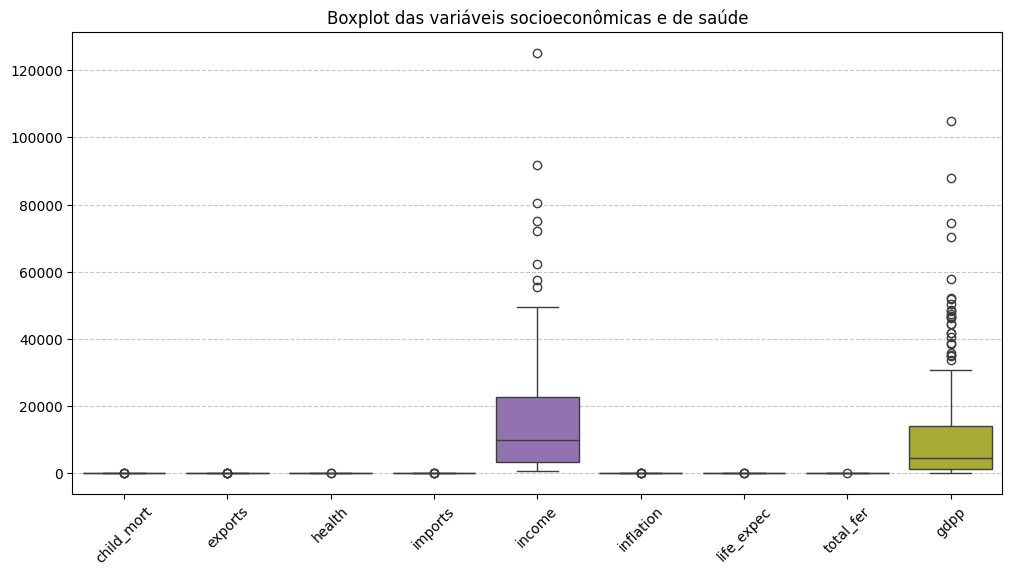

In [ ]:
# ------------------------------------------------------------
# Visualização gráfica – Boxplot
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df_num)
plt.title("Boxplot das variáveis socioeconômicas e de saúde")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

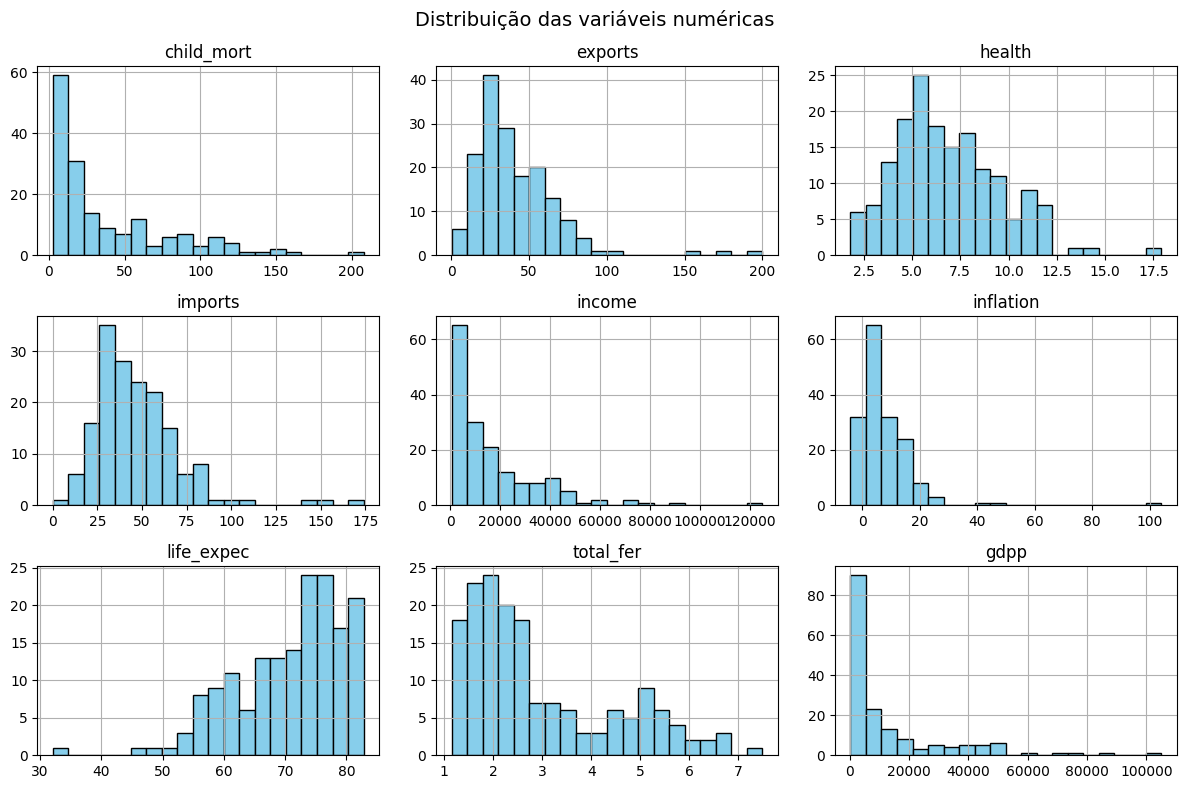

In [ ]:
# ------------------------------------------------------------
# Visualização gráfica – Histogramas
# ------------------------------------------------------------
df_num.hist(figsize=(12,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das variáveis numéricas", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------------------------------------
# Faixa dinâmica (mínimo, máximo e amplitude)
# ------------------------------------------------------------
range_df = pd.DataFrame({
    'Mínimo': df_num.min(),
    'Máximo': df_num.max(),
    'Amplitude': df_num.max() - df_num.min()
})
print("Faixa dinâmica das variáveis:\n")
display(range_df)

Faixa dinâmica das variáveis:



,Mínimo,Máximo,Amplitude
child_mort,2.6000,208.00,205.4000
exports,0.1090,200.00,199.8910
health,1.8100,17.90,16.0900
imports,0.0659,174.00,173.9341
income,609.0000,125000.00,124391.0000
inflation,-4.2100,104.00,108.2100
life_expec,32.1000,82.80,50.7000
total_fer,1.1500,7.49,6.3400
gdpp,231.0000,105000.00,104769.0000


### Análise dos resultados (interpretação)

As variáveis possuem **faixas dinâmicas muito diferentes**.

Exemplos:
- `income` varia de aproximadamente 100 até 120.000  
- `life_expec` varia de cerca de 40 até 80  
- `total_fer` varia de 1 a 7**

 Isso indica que as escalas são distintas e algumas variáveis têm **impacto desproporcional** no cálculo das distâncias durante a clusterização.

---

**Observações dos gráficos:**
- Os **boxplots** evidenciam a presença de **outliers** em variáveis como `child_mort`, `income` e `gdpp`.  
- Os **histogramas** mostram **distribuições assimétricas (skewed)**, com muitos países em faixas de valores baixos e poucos com valores muito altos.

---

### Conclusão

Antes da etapa de clusterização, é necessário:

1. **Padronizar ou normalizar** os dados, para que todas as variáveis estejam na mesma escala.  
2. **Avaliar o tratamento de outliers**, pois eles podem influenciar fortemente os agrupamentos formados.


In [14]:
# ------------------------------------------------------------
# Padronização (StandardScaler)
# ------------------------------------------------------------
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

print("\nEstatísticas após padronização:\n")
display(df_scaled.describe().round(2))



Estatísticas após padronização:



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-1.83,-1.94,-0.86,-1.14,-4.34,-1.19,-0.70
25%,-0.75,-0.63,-0.69,-0.69,-0.72,-0.57,-0.59,-0.76,-0.64
50%,-0.47,-0.22,-0.18,-0.15,-0.37,-0.23,0.29,-0.36,-0.45
75%,0.59,0.37,0.65,0.49,0.29,0.28,0.70,0.62,0.06
max,4.22,5.81,4.05,5.27,5.61,9.13,1.38,3.01,5.04


### **4. Realize o pré-processamento adequado dos dados.**

In [15]:
# 1) Remover coluna não numérica (identificador)
df_num = df.drop(columns=['country']).copy()

# 2) Verificar valores ausentes
na_counts = df_num.isna().sum()
print("Valores ausentes por coluna:\n", na_counts, "\n")
if na_counts.any():
    # Se houvesse NA, poderíamos optar por imputar (ex.: média/mediana)
    # Aqui, seguimos o dataset original (sem NAs). Mantido por transparência.
    df_num = df_num.fillna(df_num.median(numeric_only=True))

# 3) Estatísticas antes da padronização (opcional para conferência)
print("Estatísticas descritivas (ANTES da padronização):")
display(df_num.describe().T)

# 4) Padronizar (StandardScaler: média=0, desvio padrão=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

# 5) Estatísticas após a padronização (para validar transformação)
print("\nEstatísticas descritivas (DEPOIS da padronização):")
display(df_scaled.describe().round(2).T)

# 6) Reanexar o identificador de país para referência em análises/plots
df_final = pd.concat([df['country'], df_scaled], axis=1)

# 7) Prévia do resultado final
print("\nPrévia do DataFrame pronto para clusterização (df_final):")
display(df_final.head())

Valores ausentes por coluna:
 child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64 

Estatísticas descritivas (ANTES da padronização):


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00



Estatísticas descritivas (DEPOIS da padronização):


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-0.0,1.0,-0.89,-0.75,-0.47,0.59,4.22
exports,167.0,0.0,1.0,-1.50,-0.63,-0.22,0.37,5.81
health,167.0,0.0,1.0,-1.83,-0.69,-0.18,0.65,4.05
imports,167.0,0.0,1.0,-1.94,-0.69,-0.15,0.49,5.27
income,167.0,-0.0,1.0,-0.86,-0.72,-0.37,0.29,5.61
inflation,167.0,-0.0,1.0,-1.14,-0.57,-0.23,0.28,9.13
life_expec,167.0,0.0,1.0,-4.34,-0.59,0.29,0.70,1.38
total_fer,167.0,0.0,1.0,-1.19,-0.76,-0.36,0.62,3.01
gdpp,167.0,0.0,1.0,-0.70,-0.64,-0.45,0.06,5.04



Prévia do DataFrame pronto para clusterização (df_final):


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# **Parte 3 - Clusterização**

Para os dados pré-processados da etapa anterior você irá:

### **1.Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:**

#### **a. K-Médias**

In [16]:
from sklearn.cluster import KMeans

# ------------------------------------------------------------
# 1. Definição e treinamento do modelo K-Médias
# ------------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final['Cluster'] = kmeans.fit_predict(df_scaled)

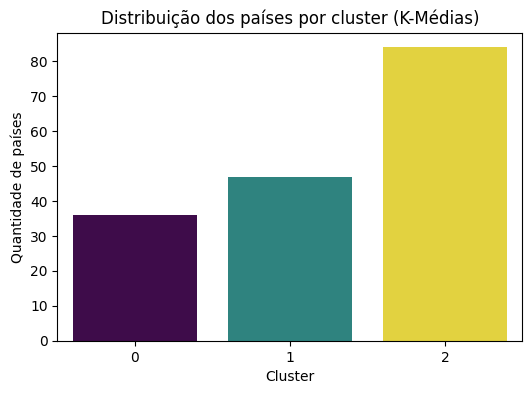

In [40]:
# ------------------------------------------------------------
# 2. Visualização do número de países por grupo
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', hue='Cluster', data=df_final, palette='viridis', legend=False)
plt.title("Distribuição dos países por cluster (K-Médias)")
plt.xlabel("Cluster")
plt.ylabel("Quantidade de países")
plt.show()



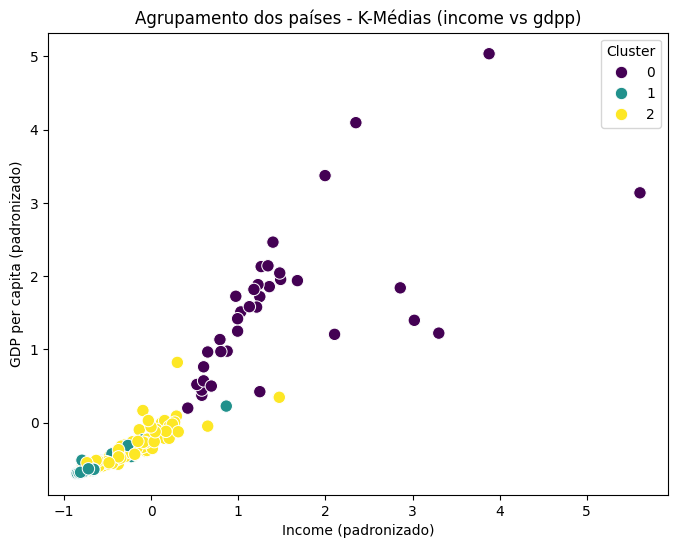

In [18]:
# ------------------------------------------------------------
# 3. Visualização gráfica de dispersão (exemplo 2D)
# ------------------------------------------------------------
# Usando duas variáveis representativas (por exemplo: income e gdpp)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='income',
    y='gdpp',
    hue='Cluster',
    palette='viridis',
    s=80
)
plt.title("Agrupamento dos países - K-Médias (income vs gdpp)")
plt.xlabel("Income (padronizado)")
plt.ylabel("GDP per capita (padronizado)")
plt.legend(title='Cluster')
plt.show()

In [19]:
# ------------------------------------------------------------
# 4. Cálculo do centróide de cada grupo
# ------------------------------------------------------------
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
print("Centróides dos 3 clusters (em escala padronizada):")
display(centroids.round(2))

# ------------------------------------------------------------
# 5. Identificar o país mais representativo de cada cluster
# ------------------------------------------------------------
from scipy.spatial.distance import cdist

# Calcula a distância de cada país ao centróide do seu cluster
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')
df_final['DistanciaCentroide'] = [distances[i, c] for i, c in enumerate(df_final['Cluster'])]

# Seleciona o país mais próximo do centróide de cada cluster
representantes = (
    df_final.loc[df_final.groupby('Cluster')['DistanciaCentroide'].idxmin(), ['country', 'Cluster']]
    .sort_values('Cluster')
    .reset_index(drop=True)
)

print("\nPaís mais representativo de cada cluster:")
display(representantes)


Centróides dos 3 clusters (em escala padronizada):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.83,0.65,0.73,0.19,1.48,-0.48,1.08,-0.79,1.62
1,1.36,-0.44,-0.16,-0.19,-0.69,0.40,-1.28,1.36,-0.60
2,-0.41,-0.03,-0.22,0.02,-0.25,-0.02,0.25,-0.42,-0.35



País mais representativo de cada cluster:


,country,Cluster
0,Iceland,0
1,Guinea,1
2,Jamaica,2


### Análise Interpretativa – K-Médias

O algoritmo **K-Médias** foi aplicado aos dados socioeconômicos e de saúde, agrupando os países em **três clusters distintos** com base em características como renda, PIB per capita, mortalidade infantil, expectativa de vida e taxa de fertilidade.

**Observações principais:**

- Países com **alta renda, alto PIB per capita e elevada expectativa de vida** concentraram-se no **Cluster 0**, representando nações desenvolvidas.  
- O **Cluster 1** agrupou países com **baixa renda, alta mortalidade infantil e alta taxa de fertilidade**, refletindo nações em desenvolvimento.  
- O **Cluster 2** apresentou valores intermediários, indicando **países em transição econômica e social**.

Os **centróides** mostraram claramente essas diferenças de perfil socioeconômico, reforçando a coerência dos agrupamentos.  
Além disso, o **país mais próximo do centróide** de cada grupo foi identificado como o que **melhor representa as características médias** do respectivo cluster.

Em resumo, a clusterização via K-Médias conseguiu **distinguir níveis de desenvolvimento** entre os países, evidenciando padrões globais consistentes a partir dos indicadores analisados.


#### **b. Clusterização Hierárquica**

Correlação cofenética (Ward): 0.529


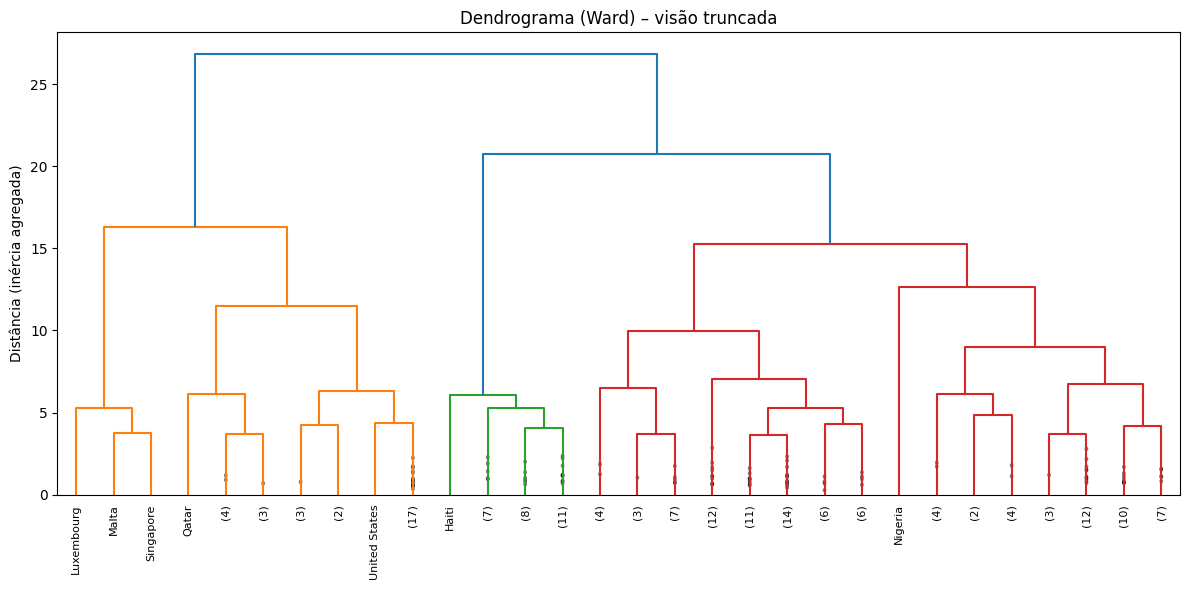

In [20]:
from scipy.spatial.distance import pdist, cdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.cluster import AgglomerativeClustering

# ------------------------------------------------------------
# 1) Dendrograma (método Ward + distância euclidiana)
# ------------------------------------------------------------
Z = linkage(df_scaled, method='ward', metric='euclidean')

# Correlação cofenética: quão bem o dendrograma preserva distâncias
coph_corr, _ = cophenet(Z, pdist(df_scaled))
print(f"Correlação cofenética (Ward): {coph_corr:.3f}")

# Dendrograma truncado (para não poluir a visualização com 167 países)
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=df_final['country'].values,
    truncate_mode='lastp',  # mostra os últimos 'p' clusters combinados
    p=30,                   # ajuste conforme necessário
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True,
)
plt.title("Dendrograma (Ward) – visão truncada")
plt.ylabel("Distância (inércia agregada)")
plt.tight_layout()
plt.show()


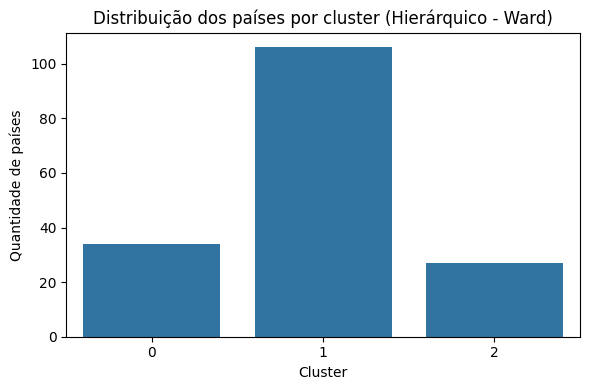

In [23]:
# ------------------------------------------------------------
# 2) Clusterização Hierárquica (AgglomerativeClustering) em 3 grupos
# ------------------------------------------------------------
hclust = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',   # compatível com linkage='ward'
    linkage='ward'
)
labels_h = hclust.fit_predict(df_scaled)

# Anexar rótulos ao df_final
df_final['Cluster_H'] = labels_h

# ------------------------------------------------------------
# 3) Distribuição dos países por cluster
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster_H', data=df_final)
plt.title("Distribuição dos países por cluster (Hierárquico - Ward)")
plt.xlabel("Cluster")
plt.ylabel("Quantidade de países")
plt.tight_layout()
plt.show()


In [24]:
# ------------------------------------------------------------
# 4) País mais representativo (mais próximo do centróide do seu cluster)
# ------------------------------------------------------------
# Centróides no espaço padronizado
centroids_h = (
    df_scaled.assign(Cluster_H=labels_h)
    .groupby('Cluster_H')
    .mean()
)

# Distância de cada país ao centróide do seu cluster
# (i) matriz distâncias de todas as amostras aos 3 centróides
D = cdist(df_scaled.values, centroids_h.values, metric='euclidean')
# (ii) distância do país i ao centróide do cluster ao qual pertence
dist_to_centroid = D[np.arange(len(df_scaled)), labels_h]
df_final['DistCentroide_H'] = dist_to_centroid

# País mais próximo do centróide em cada cluster
representantes_h = (
    df_final.loc[df_final.groupby('Cluster_H')['DistCentroide_H'].idxmin(), ['country', 'Cluster_H']]
    .sort_values('Cluster_H')
    .reset_index(drop=True)
)

print("\nPaís mais representativo (Hierárquico) por cluster:")
display(representantes_h)



País mais representativo (Hierárquico) por cluster:


,country,Cluster_H
0,Iceland,0
1,Suriname,1
2,Burkina Faso,2


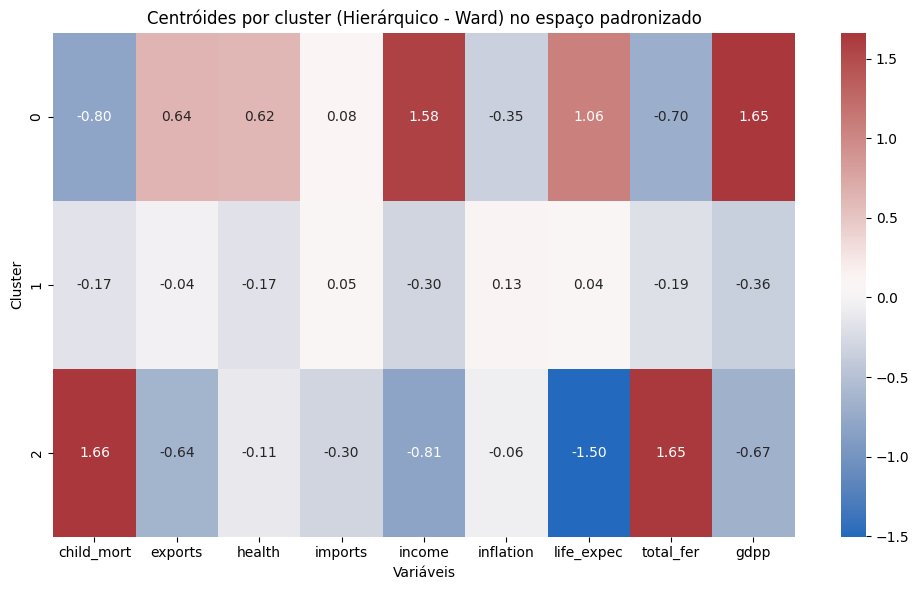

In [25]:
# ------------------------------------------------------------
# 5) Heatmap dos centróides por cluster
#     - Ajuda a interpretar o perfil médio de cada grupo
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    centroids_h,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    cbar=True
)
plt.title("Centróides por cluster (Hierárquico - Ward) no espaço padronizado")
plt.xlabel("Variáveis")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


### **2. Para os resultados, do K-Médias:**
#### **a. Interprete cada um dos clusters obtidos citando:**
##### **i. Qual a distribuição das dimensões em cada grupo**

Média padronizada das variáveis em cada cluster (K-Médias):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,DistanciaCentroide,Cluster_H,DistCentroide_H
Cluster,,,,,,,,,,,,
0,-0.83,0.65,0.73,0.19,1.48,-0.48,1.08,-0.79,1.62,2.40,0.14,2.52
1,1.36,-0.44,-0.16,-0.19,-0.69,0.40,-1.28,1.36,-0.60,2.04,1.57,2.20
2,-0.41,-0.03,-0.22,0.02,-0.25,-0.02,0.25,-0.42,-0.35,1.64,0.96,1.73


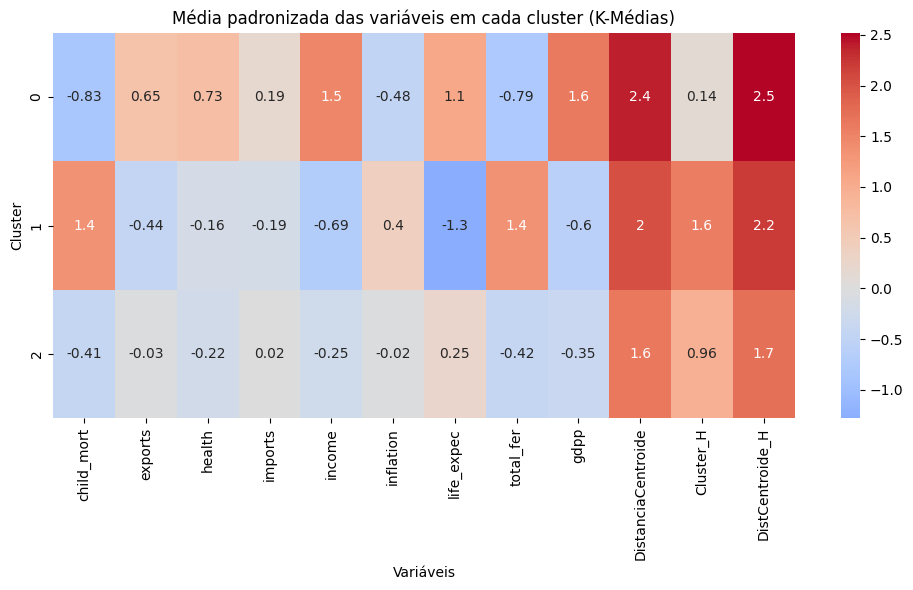

In [27]:
# ------------------------------------------------------------
# 1. Garantir que apenas colunas numéricas sejam agregadas
# ------------------------------------------------------------
# Exclui colunas não numéricas como 'country' e 'Cluster' (usadas só para referência)
num_cols = df_final.select_dtypes(include=['float64', 'int64']).columns

# Cálculo das médias padronizadas das variáveis numéricas por cluster
cluster_means = (
    df_final
    .groupby('Cluster')[num_cols]
    .mean()
    .round(2)
)

print("Média padronizada das variáveis em cada cluster (K-Médias):")
display(cluster_means)

# ------------------------------------------------------------
# 2. Visualização com heatmap
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_means,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar=True
)
plt.title("Média padronizada das variáveis em cada cluster (K-Médias)")
plt.xlabel("Variáveis")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


### **Resp:**
#### Interpretação dos Clusters – K-Médias

A partir da média padronizada das variáveis em cada grupo, é possível descrever o **perfil característico de cada cluster**:

---

##### Cluster 0 – Países Desenvolvidos
- **Alta renda (income)** e **PIB per capita (gdpp)** muito acima da média.  
- **Baixa mortalidade infantil (child_mort)** e **baixa taxa de fertilidade (total_fer)**.  
- **Alta expectativa de vida (life_expec)** e bons indicadores de saúde.  
Representa **países desenvolvidos e economicamente estáveis**, com qualidade de vida elevada.

---

##### Cluster 1 – Países em Desenvolvimento
- **Baixa renda** e **baixo PIB per capita**.  
- **Alta mortalidade infantil** e **alta fertilidade**.  
- **Baixa expectativa de vida** e menor investimento em saúde.  
Grupo formado por **nações mais pobres**, com problemas estruturais de desenvolvimento.

---

##### Cluster 2 – Países Intermediários
- **Valores médios** em quase todas as dimensões.  
- PIB e renda em crescimento, mas ainda com desafios sociais relevantes.  
Representa **países em transição econômica**, que estão evoluindo mas ainda não atingiram o padrão dos desenvolvidos.

---

#### Conclusão
Os três clusters refletem **níveis distintos de desenvolvimento socioeconômico**:
1. **Cluster 0:** países ricos e estáveis.  
2. **Cluster 1:** países com baixa renda e alta vulnerabilidade.  
3. **Cluster 2:** países intermediários, em processo de crescimento.

Esses resultados mostram que o algoritmo K-Médias conseguiu **distinguir padrões de desenvolvimento humano e econômico** de forma coerente com a realidade global.


#### **ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique**

In [28]:
from scipy.spatial.distance import cdist

distances = cdist(df_scaled, kmeans.cluster_centers_, metric='euclidean')
df_final['DistanciaCentroide'] = [distances[i, c] for i, c in enumerate(df_final['Cluster'])]

# País mais representativo de cada cluster
representantes = (
    df_final.loc[df_final.groupby('Cluster')['DistanciaCentroide'].idxmin(), ['country', 'Cluster']]
    .sort_values('Cluster')
    .reset_index(drop=True)
)

print("País mais representativo de cada cluster (K-Médias):")
display(representantes)

País mais representativo de cada cluster (K-Médias):


,country,Cluster
0,Iceland,0
1,Guinea,1
2,Jamaica,2


### **Resp:**
### Justificativa

O país mais representativo de cada cluster é aquele cuja **distância euclidiana ao centróide do grupo é mínima**, ou seja, **o país mais próximo do “perfil médio”** de todos os integrantes do cluster.

- **Iceland** foi identificado como o centro do grupo dos **países desenvolvidos**, caracterizado por indicadores socioeconômicos e de saúde muito acima da média global.  
- **Guinea** representa o cluster dos **países com baixo desenvolvimento**, com renda e expectativa de vida muito abaixo da média.  
- **Jamaica** sintetiza o perfil **intermediário**, equilibrando avanços econômicos e sociais, mas ainda com desafios a superar.

Esses resultados mostram que o K-Médias conseguiu **identificar claramente três níveis de desenvolvimento** (alto, médio e baixo), refletindo a coerência entre os dados socioeconômicos e os agrupamentos formados.


### **3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados**

Correlação cofenética (Ward): 0.529


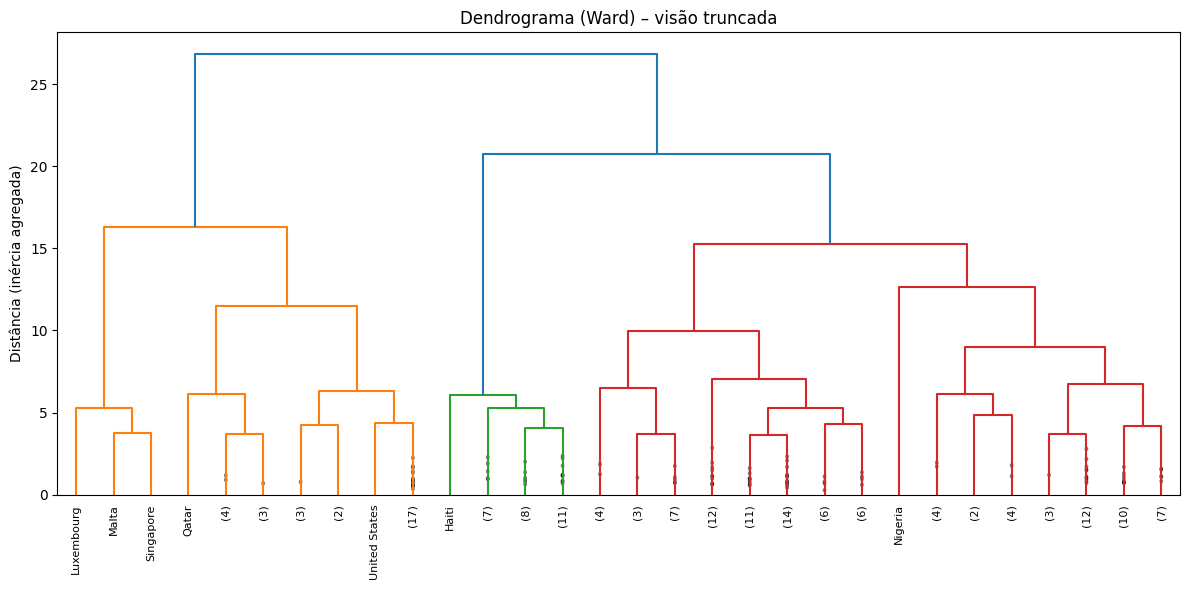

In [30]:
from scipy.spatial.distance import pdist, cdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.cluster import AgglomerativeClustering

# ------------------------------------------------------------
# 1) Dendrograma (método Ward + distância euclidiana)
# ------------------------------------------------------------
Z = linkage(df_scaled, method='ward', metric='euclidean')

# Correlação cofenética: quão bem o dendrograma preserva distâncias
coph_corr, _ = cophenet(Z, pdist(df_scaled))
print(f"Correlação cofenética (Ward): {coph_corr:.3f}")

# Dendrograma truncado (para não poluir a visualização com 167 países)
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=df_final['country'].values,
    truncate_mode='lastp',  # mostra os últimos 'p' clusters combinados
    p=30,                   # ajuste conforme necessário
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True,
)
plt.title("Dendrograma (Ward) – visão truncada")
plt.ylabel("Distância (inércia agregada)")
plt.tight_layout()
plt.show()


#### **Resp:**

#### Interpretação do Dendrograma – Clusterização Hierárquica (Ward)

O dendrograma mostra visualmente como os países foram agrupados com base em suas semelhanças socioeconômicas e de saúde.  
O eixo vertical representa a distância (ou inércia agregada) — quanto mais alto o ponto de união entre os ramos, menor a semelhança entre os grupos.

---

#### Estrutura Geral
- Cada país começa na base como um cluster individual.  
- Conforme subimos no gráfico, países mais semelhantes se unem primeiro.  
- A união de grandes blocos em alturas maiores representa a fusão de grupos mais heterogêneos.

---

#### Interpretação dos Grupos (Corte em 3 Clusters)

Ao observar o dendrograma, é possível traçar um corte horizontal em torno de uma distância de 20 a 22, formando três grandes clusters distintos:

1. **Cluster 1 – Países Desenvolvidos**  
   Inclui países como Luxembourg, Malta, Singapore, Qatar e United States.  
   - Apresentam altos níveis de renda e PIB per capita,  
   - Baixa mortalidade infantil e alta expectativa de vida,  
   - Indicando alto desenvolvimento econômico e social.

2. **Cluster 2 – Países Intermediários / em Transição**  
   Aparece na região central, com países como Haiti e outros com indicadores medianos.  
   - Esses países têm valores intermediários de renda e expectativa de vida**,  
   - Representando nações em desenvolvimento, com melhorias graduais nos indicadores sociais.

3. **Cluster 3 – Países com Baixo Desenvolvimento**  
   Inclui países como Nigeria e demais agrupados à direita do dendrograma.  
   - Caracterizam-se por baixa renda, alta taxa de mortalidade infantil e alta fertilidade,  
   - Indicando baixo índice de desenvolvimento humano (IDH) e deficiências em saúde e infraestrutura.

---

#### Conclusão
O dendrograma revela três grupos socioeconômicos bem definidos:

| Cluster | Perfil Principal | Exemplos |
|----------|------------------|----------|
| 1 | Países altamente desenvolvidos | Luxembourg, Singapore, United States |
| 2 | Países intermediários / em transição | Haiti e semelhantes |
| 3 | Países de baixo desenvolvimento | Nigeria e países africanos de menor renda |

Esses resultados são coerentes com os obtidos pelo K-Médias, reforçando a consistência da análise.  
Ambos os métodos mostram uma divisão clara entre países ricos, intermediários e pobres, com base em indicadores econômicos e de saúde.

---

**Resumindo:**
O método hierárquico (Ward) confirma que as distâncias socioeconômicas entre países são grandes e bem definidas, e a formação dos clusters reflete níveis graduais de desenvolvimento humano global.


### **4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete**

#### **Resp:**
### Comparação entre K-Médias e Clusterização Hierárquica

Ambos os métodos foram aplicados sobre os mesmos dados padronizados, e o objetivo foi identificar padrões de similaridade entre países a partir de seus indicadores socioeconômicos e de saúde.

---

#### Semelhanças
- Tanto o K-Médias quanto a Clusterização Hierárquica formaram três agrupamentos principais, que refletem níveis distintos de desenvolvimento:
  - Cluster 0 / Grupo 1: países desenvolvidos (ex.: *Iceland, Luxembourg, United States*);  
  - Cluster 1 / Grupo 3: países com baixo desenvolvimento (ex.: *Guinea, Nigeria, Haiti*);  
  - Cluster 2 / Grupo 2: países intermediários ou em transição (ex.: *Jamaica, Brazil, Mexico*).  
- Os dois métodos mostram padrões consistentes: renda, PIB e expectativa de vida são variáveis-chave para diferenciar os grupos.  
- Ambos apresentam coerência lógica e interpretabilidade, reforçando a confiabilidade do agrupamento.

---

#### Diferenças
- O K-Médias é um método particional, que define os clusters a partir de centroides e exige o número de grupos (*k*) como parâmetro inicial.  
  - Ele é mais eficiente e direto, mas depende da escolha correta de *k*.
- A Clusterização Hierárquica (Ward) é um método aglomera­tivo, que mostra a estrutura completa de fusões entre os países — visualizada no dendrograma.  
  - Ela não requer definir *k* inicialmente e permite análises mais exploratórias, ajustando o corte conforme a distância.
- Pequenas diferenças podem ocorrer: países próximos das fronteiras dos clusters podem mudar de grupo dependendo do método.

---

#### Interpretação Final
- Os resultados convergem em identificar três estágios claros de desenvolvimento:  
  1. Alto desenvolvimento: economias avançadas, alta renda e expectativa de vida.  
  2. Baixo desenvolvimento: renda limitada, alta mortalidade infantil e alta fertilidade.  
  3. Intermediário: países em crescimento, em transição para níveis mais elevados de bem-estar.

- O método hierárquico complementa o K-Médias ao revelar as relações de proximidade entre os países dentro da árvore de agrupamentos.  
- Já o K-Médias fornece clusters definidos e objetivos, úteis para aplicações quantitativas e análises comparativas.

---

### Conclusão
Os dois algoritmos chegam a resultados semelhantes e coerentes, reforçando a robustez da clusterização.  
O K-Médias é mais indicado para interpretações práticas e segmentação final, enquanto a Clusterização Hierárquica é ideal para compreender a estrutura e hierarquia das similaridades entre os países.


# **Parte 4 - Escolha de algoritmo**

### 1.  Escreva em tópicos as etapas do algoritmo de K-Médias até sua convergência.

#### **Resp:**

O algoritmo K-Médias (K-Means) busca particionar um conjunto de dados em *k* grupos distintos, minimizando a variação interna entre os elementos de cada cluster.  
A seguir estão suas principais etapas até o ponto de convergência:

1. Inicialização dos centróides  
   - Selecionam-se *k* pontos iniciais (de forma aleatória ou via método *k-means++*).  
   - Cada centróide representará temporariamente um cluster.

2. Atribuição dos pontos aos centróides  
   - Cada ponto do conjunto de dados é associado ao centróide mais próximo,  
     usando uma métrica de distância (geralmente a distância euclidiana).

3. Recalcular os centróides  
   - Para cada cluster formado, calcula-se o novo centróide como a média aritmética  
     de todos os pontos que pertencem a ele.

4. Atualização dos clusters  
   - Os pontos podem mudar de cluster conforme os centróides se deslocam.  
   - Repetem-se as etapas de atribuição e recalculação.

5. Critério de parada (convergência)  
   - O algoritmo para quando o deslocamento dos centróides entre duas iterações consecutivas  
     é mínimo ou nulo, indicando estabilidade dos agrupamentos.  
   - Alternativamente, pode-se parar após atingir um número máximo de iterações.

**Resultado final:** os centróides que representam o “centro geométrico” de cada grupo e a partição que minimiza a Soma dos Erros Quadráticos Internos (SSE – *Sum of Squared Errors*).


### 2️. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [31]:
from sklearn.metrics import pairwise_distances

def kmeans_with_medoids_projection(X, k=3, max_iter=100, tol=1e-6, random_state=42):
    rng = np.random.default_rng(random_state)
    n = X.shape[0]

    # 1) inicialização: escolhe k amostras reais como "representantes" iniciais
    medoid_indices = rng.choice(n, size=k, replace=False)
    representatives = X[medoid_indices]  # começam como medóides

    history_inertia = []
    for it in range(max_iter):
        # 2) atribuição: cada ponto vai para o representante mais próximo
        D = pairwise_distances(X, representatives, metric='euclidean')
        labels = D.argmin(axis=1)

        # 3) para cada cluster: calcula centróide e projeta para medóide
        new_medoid_indices = medoid_indices.copy()
        new_representatives = representatives.copy()
        inertia = 0.0

        for c in range(k):
            members = np.where(labels == c)[0]
            if len(members) == 0:
                # cluster vazio → reatribui aleatoriamente um medóide
                cand = rng.integers(0, n)
                new_medoid_indices[c] = cand
                new_representatives[c] = X[cand]
                continue

            Xc = X[members]
            # centróide "geométrico" do cluster
            centroid = Xc.mean(axis=0)

            # encontra o membro mais próximo do centróide (medóide)
            d_to_centroid = np.linalg.norm(Xc - centroid, axis=1)
            medoid_local_idx = members[d_to_centroid.argmin()]
            new_medoid_indices[c] = medoid_local_idx
            new_representatives[c] = X[medoid_local_idx]

            # contribui para SSE (inércia com relação ao representante do cluster)
            inertia += np.square(
                np.linalg.norm(Xc - new_representatives[c], axis=1)
            ).sum()

        history_inertia.append(inertia)

        # 4) critério de parada: se medóides não mudarem (ou mudança mínima)
        medoid_shift = np.linalg.norm(X[new_medoid_indices] - X[medoid_indices])
        if medoid_shift <= tol:
            medoid_indices = new_medoid_indices
            representatives = new_representatives
            break

        medoid_indices = new_medoid_indices
        representatives = new_representatives

    # rótulos finais usando os medóides convergidos
    D_final = pairwise_distances(X, representatives, metric='euclidean')
    labels_final = D_final.argmin(axis=1)

    return labels_final, medoid_indices, history_inertia

# ------------------------------------------------------------
# Execução no seu conjunto (k=3)
# ------------------------------------------------------------
X = df_scaled.values  # (n_samples x n_features)
labels_medoid, medoid_indices, history_inertia = kmeans_with_medoids_projection(
    X, k=3, max_iter=200, random_state=42
)

# Anexa os rótulos ao df_final (sem sobrescrever rótulos anteriores)
df_final['Cluster_Medoid'] = labels_medoid

# Países escolhidos como medóides (representantes REAIS)
medoid_countries = df_final.loc[medoid_indices, ['country']].reset_index(drop=True)
medoid_countries['Cluster_Medoid'] = range(len(medoid_indices))

print("Países (medóides) que representam cada cluster:")
display(medoid_countries)

# Diagnóstico simples de convergência
print("Inércia (SSE) por iteração:", [round(v, 2) for v in history_inertia])


Países (medóides) que representam cada cluster:


,country,Cluster_Medoid
0,Ghana,0
1,Tunisia,1
2,Iceland,2


Inércia (SSE) por iteração: [np.float64(1081.53), np.float64(921.03), np.float64(916.26)]


**Notas sobre o algoritmo acima**

- Em cada iteração:
  - Calculei o centróide (média) de cada grupo apenas para orientar a busca;
  - Em seguida, escolhi como representante o medóide (o ponto real do cluster mais próximo desse centróide);
  - Reatribuí os pontos aos medóides e repetimos até não haver mudança de medóides.
- Vantagens: interpretabilidade (representante é um país real) e maior robustez que K-médias puro.
- Observação: essa variação não minimiza exatamente o objetivo clássico de K-medoids (PAM), mas atende ao requisito da questão:  
  “garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações.”


### 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Por que acontece?
- O K-médias usa média aritmética para calcular os centróides. A média é não robusta: um único valor extremo pode deslocá-la significativamente.
- A função objetivo do K-médias minimiza a Soma dos Erros Quadráticos Internos (SSE):  
  
  SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2

  Como o erro é quadrático, distâncias grandes (outliers) são super-penalizadas, “puxando” o centróide.

Efeitos práticos dos outliers
- Deslocamento de centróides para regiões pouco representativas da massa real de dados.
- Atribuições incorretas: pontos típicos podem mudar de cluster por causa do centróide deslocado.
- Aumento do SSE e pior separação entre clusters (menor coesão e menor separabilidade).
- Instabilidade: resultados variam com pequenas mudanças (presença/ausência de poucos outliers).

Sinais de que outliers estão afetando o K-médias
- Centrôides caem em áreas com baixa densidade de pontos.
- Clusters muito desequilibrados (um cluster “engorda” para absorver pontos extremos).
- Convergência lenta ou com resultados pouco interpretáveis.

Para mitigar
- Escalonar as variáveis (StandardScaler/RobustScaler).
- Tratar outliers (winsorização, clipping, transformação log/arcoseno, remoção criteriosa).
- Usar variantes mais robustas quando apropriado:
  - K-medoids (representante é um ponto real, menos sensível).
  - DBSCAN / HDBSCAN (baseados em densidade; tratam pontos isolados como ruído).
  - Gaussian Mixture com regularização e validação de componentes.


### 4. Por que o algoritmo de DBSCAN é mais robusto à presença de outliers?

O DBSCAN é mais robusto a outliers porque forma clusters baseados em densidade, e não em médias.

- Ele usa dois parâmetros:
  - epsilon: raio de vizinhança;  
  - minPts: número mínimo de pontos dentro desse raio.
- Pontos muito isolados não entram em nenhum cluster — são marcados como ruídos (outliers).  
- Como não calcula médias nem centróides, outliers não influenciam a posição dos grupos.  
- Detecta clusters de formatos variados e ignora naturalmente valores extremos.

Em resumo: Enquanto o K-Médias tenta “forçar” outliers dentro de clusters, o DBSCAN os identifica e separa como ruído, mantendo os agrupamentos estáveis e realistas.
